In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
import statsmodels.api as sm
%precision %.3f

'%.3f'

In [4]:
# Load the credit dat set
credit = pd.read_csv('Credit.csv')
credit.info()
credit.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  400 non-null    int64  
 1   ID          400 non-null    int64  
 2   Income      400 non-null    float64
 3   Limit       400 non-null    int64  
 4   Rating      400 non-null    int64  
 5   Cards       400 non-null    int64  
 6   Age         400 non-null    int64  
 7   Education   400 non-null    int64  
 8   Gender      400 non-null    object 
 9   Student     400 non-null    object 
 10  Married     400 non-null    object 
 11  Ethnicity   400 non-null    object 
 12  Balance     400 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 40.8+ KB


,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


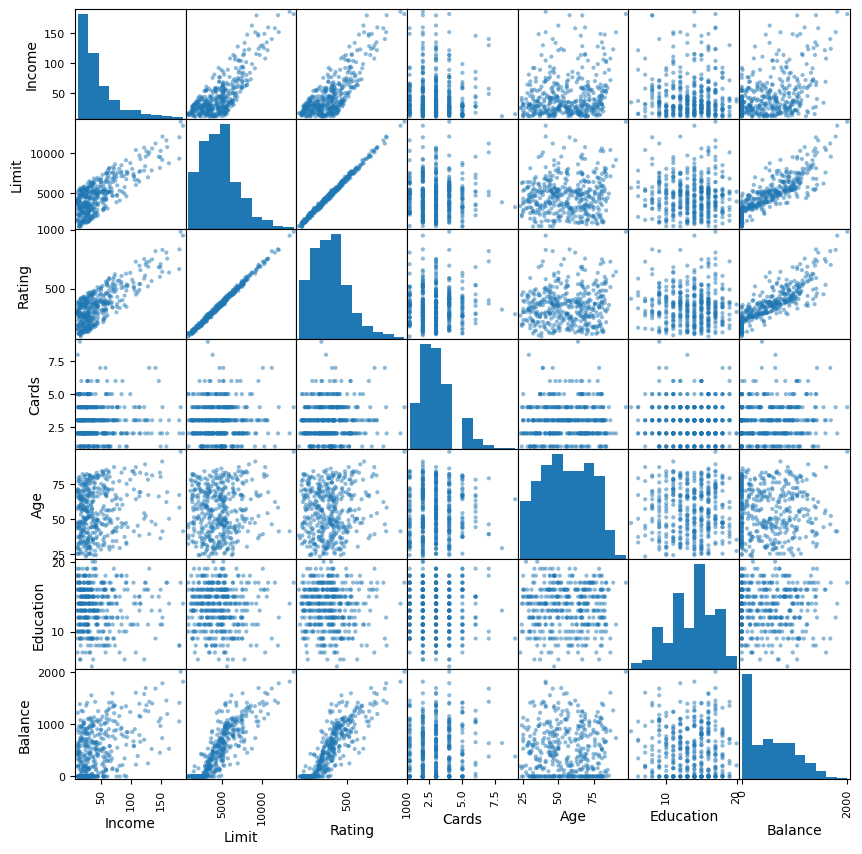

In [22]:
credit_quantitative = credit[['Income', 'Limit', 'Rating', 'Cards', 'Age', 
                              'Education', 'Balance']].copy()
pd.plotting.scatter_matrix(credit_quantitative, figsize=(10,10))
plt.savefig("scatter_credit.png")

In [5]:
# 1. Define dummy variable (a.k.a one-hot-encoding)
credit['female'] = (credit['Gender'] == 'Female').astype(int)

# 2. Build the design matrix (add a constant explicitly)
# adds intercept + dummy
X = sm.add_constant(credit[['female']])   # adds intercept + dummy
y = credit['Balance']

# 3. Fit the model
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Tue, 24 Jun 2025   Prob (F-statistic):              0.669
Time:                        16:20:33   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        509.8031     33.128     15.389      0.0

In [25]:
credit['x_i1'] = (credit['Ethnicity'] == 'Asian').astype(int)
credit['x_i2'] = (credit['Ethnicity'] == 'Caucasian').astype(int)

# add intercept + our two dummies
X = sm.add_constant(credit[['x_i1', 'x_i2']]) 
y = credit['Balance']                                 

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Tue, 27 May 2025   Prob (F-statistic):              0.957
Time:                        15:47:21   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        531.0000     46.319     11.464      0.0

## Modelling interactions

In [26]:
Advertising = pd.read_csv("Advertising.csv")

In [29]:
# 1) Create the interaction term
Advertising['TV_radio'] = Advertising['TV'] * Advertising['radio']

# 2) Define matrix X (with constant) and response y
X = Advertising[['TV', 'radio', 'TV_radio']]
X = sm.add_constant(X)   # adds the intercept β₀
y = Advertising['sales']

# 3) Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Tue, 27 May 2025   Prob (F-statistic):          6.68e-146
Time:                        16:46:35   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7502      0.248     27.233      0.0

In [33]:
# Convert student column to 0 or 1
credit['student'] = (credit['Student']=='Yes').astype(int)

X = credit[['Income', 'student']]  
X = sm.add_constant(X)                       
y = credit['Balance']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     76.22
Date:                Tue, 27 May 2025   Prob (F-statistic):           9.64e-29
Time:                        17:03:25   Log-Likelihood:                -2954.4
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     397   BIC:                             5927.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        211.1430     32.457      6.505      0.0

In [35]:
credit['income_student'] = credit['Income'] * credit['student']

X = credit[['Income', 'student', 'income_student']]  
X = sm.add_constant(X)                       
y = credit['Balance']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     51.30
Date:                Tue, 27 May 2025   Prob (F-statistic):           4.94e-28
Time:                        17:05:50   Log-Likelihood:                -2953.7
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     396   BIC:                             5931.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            200.6232     33.698      5.

## Non-linear effects

In [13]:
auto = pd.read_csv("Auto.csv")
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [14]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [20]:
# 1) Make sure horsepower is numeric
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')

# 2) Drop rows where horsepower or mpg is NaN
auto_clean = auto.dropna(subset=['horsepower','mpg']).copy()
# 3) Build design matrix and response
X = auto_clean[['horsepower']]
X = sm.add_constant(X)
y = auto_clean['mpg']

# 4) Fit the model
model_1 = sm.OLS(y, X).fit()

# 5) Print the summary of model_1
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 06 Jun 2025   Prob (F-statistic):           7.03e-81
Time:                        13:19:20   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

In [57]:
auto_clean['hp2'] = auto_clean['horsepower'] ** 2

# 3) Build design matrix with both horsepower and horsepower^2
X = auto_clean[['horsepower','hp2']]
X = sm.add_constant(X)       # intercept + horsepower + horsepower^2
y = auto_clean['mpg']

# 4) Fit the quadratic model
model_2 = sm.OLS(y, X).fit()

# 5) Show the results
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Tue, 27 May 2025   Prob (F-statistic):           5.40e-99
Time:                        17:27:08   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.9001      1.800     31.604      0.0

In [59]:
for deg in range(2, 6):
    auto_clean[f'hp{deg}'] = auto_clean['horsepower'] ** deg

# 3) Build design matrix with powers 1–5
X = auto_clean[['horsepower','hp2','hp3','hp4','hp5']]
X = sm.add_constant(X)
y = auto_clean['mpg']

# 4) Fit the 5th‐degree model
model_5 = sm.OLS(y, X).fit()

# 5) Examine the results
print(model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     177.4
Date:                Tue, 27 May 2025   Prob (F-statistic):           1.16e-97
Time:                        17:29:23   Log-Likelihood:                -1127.3
No. Observations:                 392   AIC:                             2267.
Df Residuals:                     386   BIC:                             2290.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -32.2306     28.574     -1.128      0.2

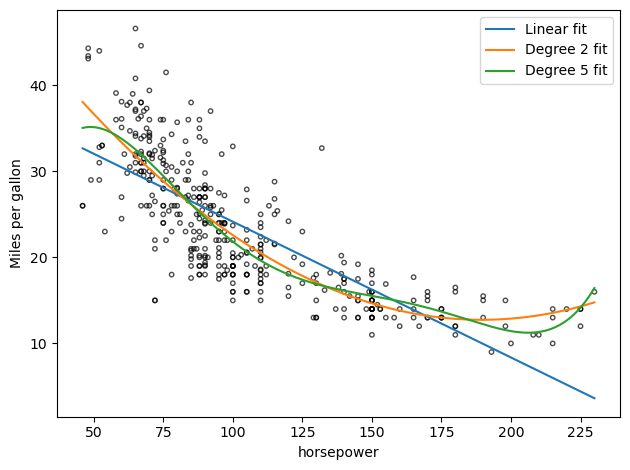

<Figure size 640x480 with 0 Axes>

In [65]:
# 1) build a fine grid of horsepower
x_grid = np.linspace(auto_clean['horsepower'].min(),
                     auto_clean['horsepower'].max(), 500)

# 2) prepare DataFrames for each model’s predict()
#    — Linear
df_lin = pd.DataFrame({'horsepower': x_grid})
df_lin = sm.add_constant(df_lin)
y_lin = model_1.predict(df_lin)

#    — Quadratic
df_quad = pd.DataFrame({'horsepower': x_grid})
df_quad['hp2'] = x_grid**2
df_quad = sm.add_constant(df_quad)
y_quad = model_2.predict(df_quad)

#    — Degree‐5
df_5 = pd.DataFrame({'horsepower': x_grid})
for deg in range(2, 6):
    df_5[f'hp{deg}'] = x_grid**deg
df_5 = sm.add_constant(df_5)
y_5 = model_5.predict(df_5)

# 3) plot everything
plt.figure()
plt.scatter(auto_clean['horsepower'], auto_clean['mpg'], marker='o',
           facecolors='none', edgecolors='black', s=10, alpha=0.7)
plt.plot(x_grid, y_lin,   label='Linear fit')
plt.plot(x_grid, y_quad,  label='Degree 2 fit')
plt.plot(x_grid, y_5,     label='Degree 5 fit')
plt.xlabel('horsepower')
plt.ylabel('Miles per gallon')
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig("horse_vs_mpg.png")

## Logistic Regression

In [3]:
# Load the Default dataset
Default = pd.read_csv('Default.csv')
Default.info()
Default.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   default     10000 non-null  object 
 2   student     10000 non-null  object 
 3   balance     10000 non-null  float64
 4   income      10000 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


,Unnamed: 0,default,student,balance,income
0,0,No,No,729.526495,44361.625074
1,1,No,Yes,817.180407,12106.134700
2,2,No,No,1073.549164,31767.138947
3,3,No,No,529.250605,35704.493935
4,4,No,No,785.655883,38463.495879


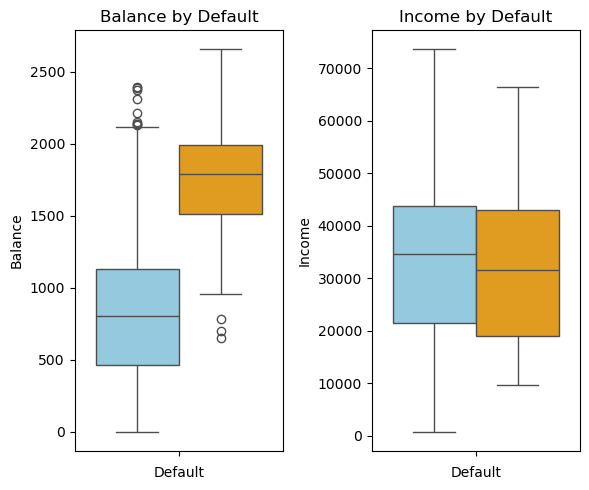

In [21]:
#Box plot
fig, axes = plt.subplots(1, 2, figsize=(6, 5))

# left: Balance by default
sns.boxplot(y='balance', hue='default',data=Default, 
            palette=['skyblue', 'orange'], ax=axes[0], legend=False)
axes[0].set_title('Balance by Default')
axes[0].set_xlabel('Default')
axes[0].set_ylabel('Balance')


sns.boxplot(y='income', hue='default',data=Default, 
            palette=['skyblue', 'orange'], ax=axes[1], legend=False)
axes[1].set_title('Income by Default')
axes[1].set_xlabel('Default')
axes[1].set_ylabel('Income')

plt.tight_layout()
plt.show()


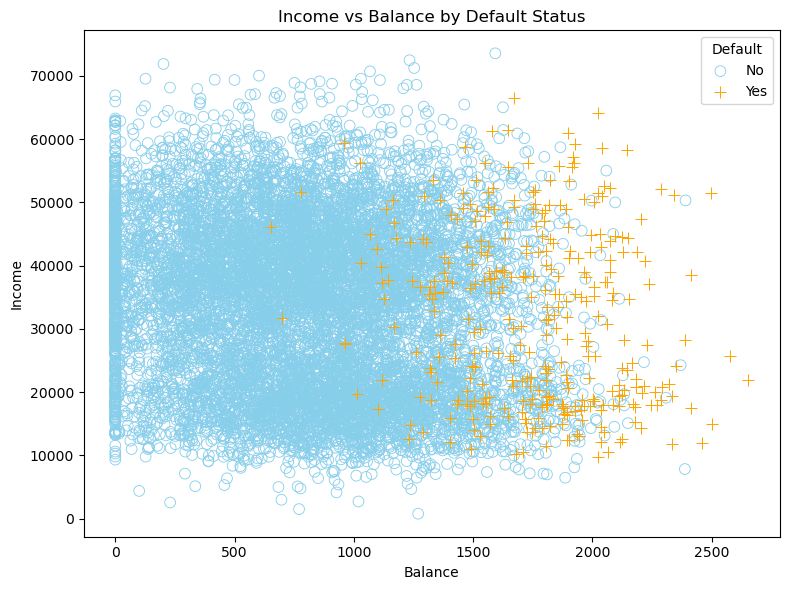

In [15]:
# Scatterplot
fig, ax = plt.subplots(figsize=(8,6))

# first layer: non-defaulters as hollow circles
sns.scatterplot(data=Default[Default.default=='No'], x='balance', y='income',
                marker='o', facecolors='none', edgecolor='skyblue',
                s=60, legend='brief', label='No',ax=ax)

# second layer: defaulters as pluses
sns.scatterplot(data=Default[Default.default=='Yes'],x='balance', y='income',
                marker='+', color='orange',s=80, legend='brief',label='Yes',ax=ax)

ax.set_xlabel('Balance')
ax.set_ylabel('Income')
ax.set_title('Income vs Balance by Default Status')
ax.legend(title='Default')
plt.tight_layout()
plt.show()

In [4]:
# Convert default variable to dummy variable (one-hot-enc)
Default['default_bool'] = (Default['default']=='Yes').astype(int)
Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    10000 non-null  int64  
 1   default       10000 non-null  object 
 2   student       10000 non-null  object 
 3   balance       10000 non-null  float64
 4   income        10000 non-null  float64
 5   default_bool  10000 non-null  int32  
dtypes: float64(2), int32(1), int64(1), object(2)
memory usage: 429.8+ KB


In [5]:
X = Default.balance
X = sm.add_constant(X)
y = Default.default_bool

logit_model = sm.Logit(y, X).fit()

print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:           default_bool   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Fri, 06 Jun 2025   Pseudo R-squ.:                  0.4534
Time:                        13:03:58   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0

## Making predictions

In [31]:
# Estimated probability of default for someone with a balance of $1000
balance_i = pd.DataFrame({'balance': [1000, 2000]})
balance_i = sm.add_constant(balance_i)

p_default = logit_model.predict(balance_i)
print(p_default)

0    0.005752
1    0.585769
dtype: float64


In [7]:
# Colomn student is object type, let's convert it to bool
Default['student_bool'] = (Default['student']=='Yes').astype(int)

X = Default.student_bool

X = sm.add_constant(X)
y = Default.default_bool

logit_model = sm.Logit(y, X).fit()

print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           default_bool   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Fri, 06 Jun 2025   Pseudo R-squ.:                0.004097
Time:                        13:04:40   Log-Likelihood:                -1454.3
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                 0.0005416
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student_bool     0.4049

In [34]:
# Estimated probability of default for each type (student = Yes or No)
student_i = pd.DataFrame({'student': [1, 0]})
student_i = sm.add_constant(student_i)

p_default = logit_model.predict(student_i)
print(p_default)

0    0.043139
1    0.029195
dtype: float64


## Multiple Logistic Regression

In [8]:
X = Default[['balance', 'income', 'student_bool']]

X = sm.add_constant(X)
y = Default.default_bool

logit_model = sm.Logit(y, X).fit()

print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:           default_bool   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Fri, 06 Jun 2025   Pseudo R-squ.:                  0.4619
Time:                        13:04:52   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance          0.005

## Construction and Validation for ML

In [10]:
# Libraries for training and test splitting
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

# Import Auto Dataset
auto = pd.read_csv("Auto.csv")
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [60]:
# Clean data
auto = auto[['mpg', 'horsepower', 'weight', 'acceleration']]
auto = auto.replace('?', np.nan).dropna()

In [48]:
# Ensure you are working with numerical data
print('Type of \n{}'.format(auto.dtypes))

Type of 
mpg             float64
horsepower       object
weight            int64
acceleration    float64
dtype: object


In [61]:
auto = auto.assign(horsepower = pd.to_numeric(auto.horsepower))
print('Type of \n{}'.format(auto.dtypes))

Type of 
mpg             float64
horsepower        int64
weight            int64
acceleration    float64
dtype: object


In [50]:
auto.corr()

,mpg,horsepower,weight,acceleration
mpg,1.000000,-0.778427,-0.832244,0.423329
horsepower,-0.778427,1.000000,0.864538,-0.689196
weight,-0.832244,0.864538,1.000000,-0.416839
acceleration,0.423329,-0.689196,-0.416839,1.000000


In [70]:
# Define features columns and response variable
X = auto[['horsepower', 'weight', 'acceleration']]
y = auto.mpg

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

print('R^2 in train data: {:.3f}'.format(model.score(X_train, y_train)))
print('R^2 in test data: {:.3f}'.format(model.score(X_test, y_test)))

print('\n Coefficients\n{}'.format(pd.Series(model.coef_, index=X.columns)))
print('Intercept: {:.3f}'.format(model.intercept_))



R^2 in train data: 0.704
R^2 in test data: 0.707

 Coefficients
horsepower     -0.045460
weight         -0.005716
acceleration    0.093247
dtype: float64
Intercept: 43.788


In [11]:
from sklearn.linear_model import LogisticRegression
X = Default[['balance', 'income', 'student_bool']]
y = Default.default_bool

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

model = LogisticRegression()
model.fit(X_train, y_train)

print('Accuracy in train data: {:.3f}'.format(model.score(X_train, y_train)))
print('Accuracy in test data: {:.3f}'.format(model.score(X_test, y_test)))


Accuracy in train data: 0.974
Accuracy in test data: 0.972


In [73]:
model.coef_

array([[ 5.68965575e-03, -6.25970083e-06, -7.97200430e-01]])